In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:

X_test.shape


(10000, 28, 28)

ABINAYA S 212222230002


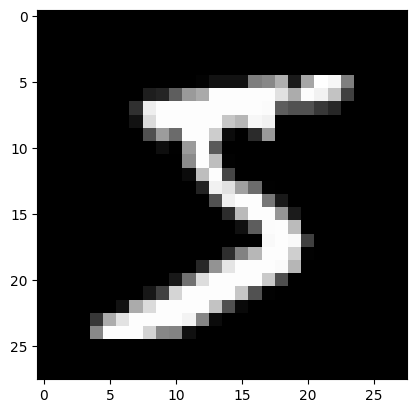

In [10]:
print("ABINAYA S 212222230002")
single_image= X_train[0]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()


1.0

In [17]:
y_train[0]

5

In [18]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [19]:
type(y_train_onehot)

numpy.ndarray

ABINAYA S 212222230002


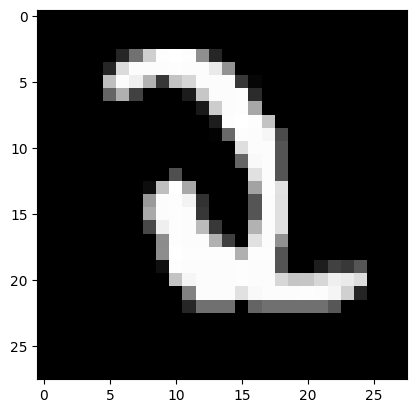

In [85]:
y_train_onehot.shape
print("ABINAYA S 212222230002")
single_image = X_train[400]
plt.imshow(single_image,cmap='gray')

In [62]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [63]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [64]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:

## Fit the model
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

## Include the training loss, validation loss vs iteration plot.
metrics = pd.DataFrame(model.history.history)
metrics.head()

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8000 - loss: 0.6741 - val_accuracy: 0.9509 - val_loss: 0.1652
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9630 - loss: 0.1299 - val_accuracy: 0.9754 - val_loss: 0.0799
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9767 - loss: 0.0807 - val_accuracy: 0.9781 - val_loss: 0.0686
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9823 - val_loss: 0.0590
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9828 - val_loss: 0.0560


,accuracy,loss,val_accuracy,val_loss
0,0.897900,0.346356,0.9509,0.165210
1,0.966750,0.115362,0.9754,0.079875
2,0.977933,0.075608,0.9781,0.068633
3,0.982050,0.059042,0.9823,0.058992
4,0.986033,0.046879,0.9828,0.056042


In [68]:
print("ABINAYA S 212222230002")
metrics = pd.DataFrame(model.history.history)
metrics.head()

ABINAYA S 212222230002


,accuracy,loss,val_accuracy,val_loss
0,0.897900,0.346356,0.9509,0.165210
1,0.966750,0.115362,0.9754,0.079875
2,0.977933,0.075608,0.9781,0.068633
3,0.982050,0.059042,0.9823,0.058992
4,0.986033,0.046879,0.9828,0.056042


ABINAYA S 212222230002


<Axes: >

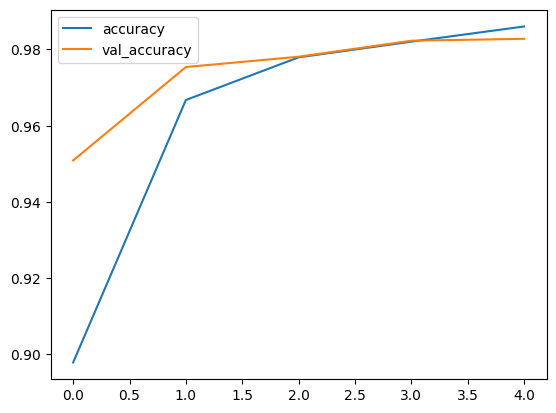

In [69]:
print("ABINAYA S 212222230002")
metrics[['accuracy','val_accuracy']].plot()

ABINAYA S 212222230002


<Axes: >

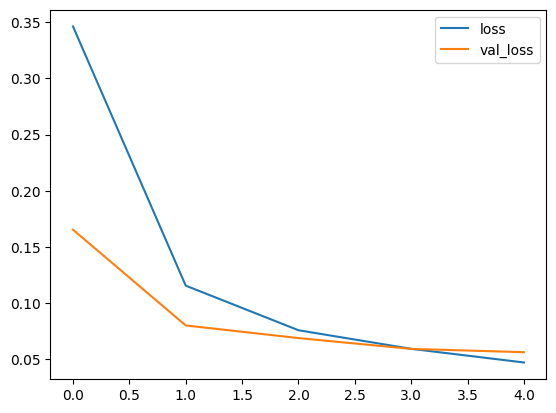

In [70]:
print("ABINAYA S 212222230002")
metrics[['loss','val_loss']].plot()

In [71]:
print("ABINAYA S 212222230002")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


ABINAYA S 212222230002
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [72]:
print("ABINAYA S 212222230002")
print(confusion_matrix(y_test,x_test_predictions))

ABINAYA S 212222230002
[[ 972    0    1    0    0    2    0    1    3    1]
 [   0 1128    2    0    0    0    1    2    2    0]
 [   4    3  998    3    2    0    1   13    8    0]
 [   0    0    1  996    0    3    0    2    6    2]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    7    0  870    7    0    5    1]
 [   8    3    0    1    4    1  935    1    5    0]
 [   1    1    3    2    1    0    0 1016    1    3]
 [   4    0    0    0    4    2    0    3  955    6]
 [   2    2    0    2   13    0    0    8    3  979]]


In [73]:
print("ABINAYA S 212222230002")
print(classification_report(y_test,x_test_predictions))

ABINAYA S 212222230002
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [77]:
img = image.load_img('/content/imgs.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [78]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [84]:
print(x_single_prediction)

[8]


ABINAYA S 212222230002


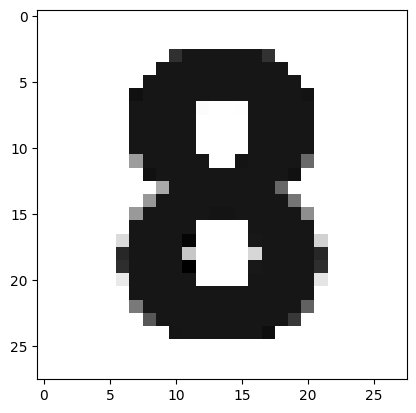

In [80]:
print("ABINAYA S 212222230002")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [81]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [82]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [83]:
print("ABINAYA S 212222230002")
print(x_single_prediction)

ABINAYA S 212222230002
[8]
